Dynamics of a single particle in free space is the simplest kind of simulation. It allows to check basic functionality of the program, and, besides, it is a good way to become familiar with how the program works.

In absence of external forces, a body moves in straight line with constant velocity

\begin{align}
& \textbf{r}(t) = \textbf{r}_0 + \textbf{v}_0 t
\\
& \textbf{v}(t) = \textbf{v}_0
\end{align}

To get some sense of scales (see below), suppose the particle is an electron that has just passed an 1 keV accelerating potential difference. Its mass `m` and charge `q` are `q = 4.8e-10 [cgs], m = 9.1e-28 [g]`. Since its energy is nonrelativistic, it's possible to calculate its speed simply as $v = \sqrt{ 2 E / m } = 1.808e+09 ~ [cm/s]$. To cover a `10 [cm]` distance with such speed, it will take the electron `t = 5.530e-09 [s] ~ 6 [ns]`.

In [22]:
#estimates

from math import *

m = 9.8e-28
q = 4.8e-10
print("q = {:.3e} [cgs]".format(q))
print("m = {:.3e} [g]".format(m))

ev_to_cgs = 1.60218e-12
E = 1000 * ev_to_cgs
v = sqrt(2 * E / m)
print("E = {:.3e} [eV] = {:.3e} [erg]".format(E / ev_to_cgs, E))
print("v = {:.3e} [cm/s]".format(v))
print("p = {:.3e} [g * cm/s]".format(v * m))

z_distance = 10
t = z_distance / v
print("z_distance = {:f} [cm]".format(z_distance))
print("t = {:.3e} [s]".format(t))

sim_time = 6.0e-9
n_of_steps = 1000
dt = sim_time / n_of_steps
print("simulation_time = {:.3e} [s]".format(sim_time))
print("number_of_time_steps = {:d}".format(n_of_steps))
print("time_step_size = {:.3e} [s]".format(dt))


q = 4.800e-10 [cgs]
m = 9.800e-28 [g]
E = 1.000e+03 [eV] = 1.602e-09 [erg]
v = 1.808e+09 [cm/s]
p = 1.772e-18 [g * cm/s]
z_distance = 10.000000 [cm]
t = 5.530e-09 [s]
simulation_time = 6.000e-09 [s]
number_of_time_steps = 1000
time_step_size = 6.000e-12 [s]


In [23]:
from math import *

m = 9.8e-28
q = 4.8e-10
print( "q = {:.3e} [cgs]".format( q ) )
print( "m = {:.3e} [g]".format( m ) )

ev_to_cgs = 1.60218e-12
E = 1000 * ev_to_cgs
v = sqrt( 2 * E / m )
z = 10
t = z / v
print( "E = {:.3e} [eV] = {:.3e} [erg]".format( E / ev_to_cgs, E ) )
print( "v = {:.3e} [cm/s]; p = {:.3e} [g * cm/s]".format( v, v * m ) )
print( "z = {:.3e} [cm]".format( z ) )
print( "t = {:.3e} [s]".format( t ) )

q = 4.800e-10 [cgs]
m = 9.800e-28 [g]
E = 1.000e+03 [eV] = 1.602e-09 [erg]
v = 1.808e+09 [cm/s]; p = 1.772e-18 [g * cm/s]
z = 1.000e+01 [cm]
t = 5.530e-09 [s]


To perform a simulation, it's necessary to prepare a config file. It is an `ini`-file with sections describing the simulation parameters, e.g.:

```
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-12
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
...
```
If Ef is invoked from the command line, this file is passed as an argument:

```
ef conf.ini
```

The list of supported config sections can be found in the wiki: https://github.com/epicf/ef/wiki/Supported-Config-File-Sections .

Config classes can be used to create, visualize and read/write to ini the config file with python or jupyter.

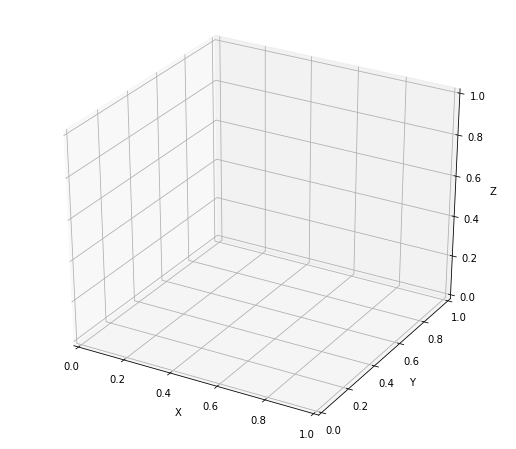

In [24]:
from ef.config.components import *
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
Visualizer3d()


First, it's necessary to set a total time of the simulation and a time step.
Let's use the estimates above as guiding values and set the total time to `6e-9 [s]`.
We use `1000` time steps, so that `time_step_size = 6.0e-12 [s]`. 
Besides, it's necessary to decide at which time steps the state of the whole simulation should be saved to the disk.
To save each tenth step, `time_save_step` is set equal to 10x of `time_step_size`: `time_save_step = 6.0e-11`.

In [25]:
single_particle_in_free_space_conf = ""

time_grid_sec = """
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + time_grid_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12



In [26]:
timegrid = TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
print(repr(timegrid))
print(timegrid)

TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
### TimeGridConf:
total = 6e-09
save_step = 6e-11
step = 6e-12


Next we need to define size of a computational volume.
Domain size is set to 15 [cm] along the z-axis and 5 [cm] along the x- and y-axes. 
The parameters for PIC-mesh are also defined in this section.
Since we are going to use noninteracting particle model instead of PIC, they are not used and can be set arbitrary. 

In [6]:
spat_mesh_sec = """
[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + spat_mesh_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5



SpatialMeshConf(size=array([ 5.,  5., 15.]), step=array([0.5, 0.5, 1.5]))
### SpatialMeshConf:
size = array([ 5.,  5., 15.])
step = array([0.5, 0.5, 1.5])


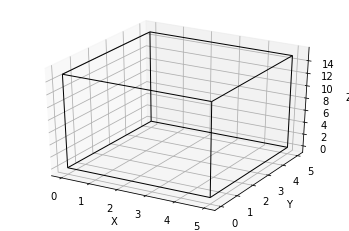

In [7]:
mesh = SpatialMeshConf((5, 5, 15), (.5, .5, 1.5))
print(repr(mesh))
print(mesh)
Visualizer3d().visualize([mesh])


Next, a particle source. 
We need a single particle at startup ( `initial_number_of_particles = 1` ), approximately 1 [mm] away from
coordinate axis origin at the bottom-left-near corner of the domain (`shape = Box( origin = (0.1, ...` below and `box_x_left = 0.10 ...` in the ini-version).
Charge and mass are set to those of the electron.
Momentum corresponding to 1 keV energy is `1.772e-18 [g * cm / s]`.
Such value is set for momentum along the z-axis. 
Momenta along the x- and y-axes could be set to zero; instead they are chosen 3 times smaller than the z-axis momentum
(domain size along the x and y is 3 times smaller than along the z). 
To prevent any variation in momentum, the `temperature` is set to 0.
Notice that the source is given a descriptive name: `emit_single_particle` in this case.

In [8]:
emit_single_particle_sec = """
[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + emit_single_particle_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28



ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([6.00e-19, 6.00e-19, 1.77e-18]), temperature=0.0, charge=4.8e-10, mass=9.8e-28)
### ParticleSourceConf:
name = 'emit_single_particle'
shape = Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01]))
initial_particles = 1
particles_to_generate_each_step = 0
momentum = array([6.00e-19, 6.00e-19, 1.77e-18])
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28


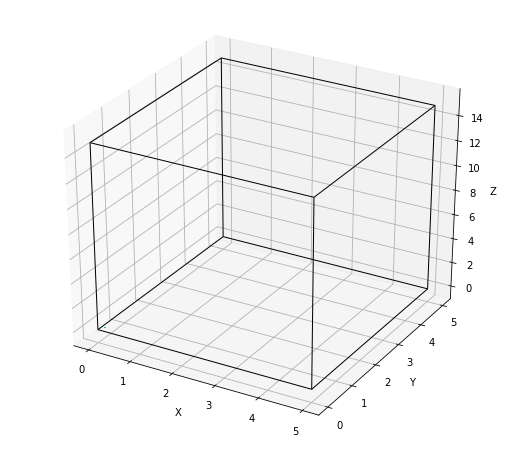

In [9]:
source = ParticleSourceConf("emit_single_particle", Box((.1, .1, .1), (.01, .01, .01)), 1, 0,
                           (6e-19, 6e-19, 1.77e-18), 0., 4.8e-10, 9.8e-28)
print(repr(source))
print(source)
Visualizer3d().visualize([mesh, source]) # small dot near (0, 0, 0) because mesh is so big

Next section is boundary conditions. 
In a free space, potentials on each boundary should be equal. 
It is possible to simply set them to zero.

In [10]:
boundary_sec = """
[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + boundary_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0



In [11]:
boundary_conditions = BoundaryConditionsConf(0)
print(repr(boundary_conditions))
print(boundary_conditions)

BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
### BoundaryConditionsConf:
right = 0.0
left = 0.0
bottom = 0.0
top = 0.0
near = 0.0
far = 0.0


Particle interaction model allows to choose between noninteracting particles, particle interacting with binary forces and PIC method. Since there is only one particle, there is no need to use PIC, and noninteracting mode is enough. Moreover, PIC will lead to wrong results (because particle creates electric field that acts back on the particle). 

In [12]:
particle_interaction_model_sec = """
[ParticleInteractionModel]
particle_interaction_model = noninteracting
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + particle_interaction_model_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[ParticleInteractionModel]
particle_interaction_model = noninteracting



In [13]:
model = ParticleInteractionModelConf('noninteracting')
print(repr(model))
print(model)

ParticleInteractionModelConf(model='noninteracting')
### ParticleInteractionModelConf:
model = 'noninteracting'


The last step is to specify pattern for output file names. 
They will be of the form `single_particle_free_space_0001000.h5`, where `0001000` is a time step number.

In [14]:
output_sec = """
[OutputFilename]
output_filename_prefix = single_particle_free_space_
output_filename_suffix = .h5
"""

single_particle_in_free_space_conf = single_particle_in_free_space_conf + output_sec

print( single_particle_in_free_space_conf )


[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_particle]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28

[BoundaryConditions]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0

[ParticleInteractionModel]
particle_interaction_model = noninteracting

[OutputFilename]
output_filename_prefix = single_particle_free_space_
output_filename_suffix = .h5



To start the simulation, the config should saved into file and provided as an argument to the `ef.out`, e.g.:

```
ef.out ./single_particle_in_free_space_conf.ini
```

EfJupyter module provides a wrapper `EfRunner` to do this.  

In [15]:
file_conf = OutputFileConf('single_particle_free_space_', '.h5')
print(repr(file_conf))
print(file_conf)

OutputFileConf(prefix='single_particle_free_space_', suffix='.h5')
### OutputFileConf:
prefix = 'single_particle_free_space_'
suffix = '.h5'


You can check that config objects describe the same simulation:

### Config:
time_grid = TimeGridConf(total=6e-09, save_step=6e-11, step=6e-12)
spatial_mesh = SpatialMeshConf(size=array([ 5.,  5., 15.]), step=array([0.5, 0.5, 1.5]))
sources = [ParticleSourceConf(name='emit_single_particle', shape=Box(origin=array([0.1, 0.1, 0.1]), size=array([0.01, 0.01, 0.01])), initial_particles=1, particles_to_generate_each_step=0, momentum=array([6.00e-19, 6.00e-19, 1.77e-18]), temperature=0.0, charge=4.8e-10, mass=9.8e-28)]
inner_regions = []
output_file = OutputFileConf(prefix='single_particle_free_space_', suffix='.h5')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='noninteracting')
external_fields = []
[TimeGrid]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12

[SpatialMesh]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5

[ParticleSourceBox.emit_single_partic

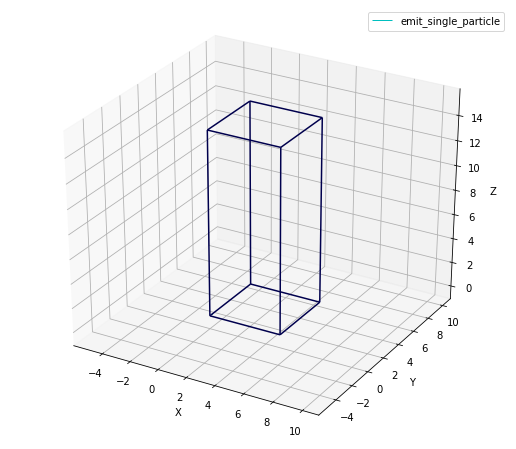

In [16]:
conf = Config(timegrid, mesh, [source], [], file_conf, boundary_conditions, model)
print(conf)
print(conf.export_to_string())
assert repr(Config.from_string(single_particle_in_free_space_conf)) == repr(conf)
conf.visualize_all(Visualizer3d())

To run outside Jupyter just save the config file

-  with any text editor
-  or with `efconf.export_to_file()`

Run `ef config.ini` in the directory where you want simulation to run and save results.

To run in python from Jupyter:

In [17]:
# if you start from .ini
# conf = Config.from_fname('config.ini')
domain = conf.make()
domain.start_pic_simulation()


Writing initial fields to file
Writing to file single_particle_free_space_fieldsWithoutParticles_new.h5
Writing to file single_particle_free_space_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file single_particle_free_space_0000000_new.h5
Writing to file single_particle_free_space_0000000.h5
Time step from 0 to 1 of 1000
Time step from 1 to 2 of 1000
Time step from 2 to 3 of 1000
Time step from 3 to 4 of 1000
Time step from 4 to 5 of 1000
Time step from 5 to 6 of 1000
Time step from 6 to 7 of 1000
Time step from 7 to 8 of 1000
Time step from 8 to 9 of 1000
Time step from 9 to 10 of 1000
Writing step 10 to file
Writing to file single_particle_free_space_0000010_new.h5
Writing to file single_particle_free_space_0000010.h5
Time step from 10 to 11 of 1000
Time step from 11 to 12 of 1000
Time step from 12 to 13 of 1000
Time step from 13 to 14 of 1000
Time step from 14 to 15 of 1000
Time step from 15 to 16 of 1000
Time step from 16 to 17 of 1000
Time step from 17 to 18 of 1000

Time step from 274 to 275 of 1000
Time step from 275 to 276 of 1000
Time step from 276 to 277 of 1000
Time step from 277 to 278 of 1000
Time step from 278 to 279 of 1000
Time step from 279 to 280 of 1000
Writing step 280 to file
Writing to file single_particle_free_space_0000280_new.h5
Writing to file single_particle_free_space_0000280.h5
Time step from 280 to 281 of 1000
Time step from 281 to 282 of 1000
Time step from 282 to 283 of 1000
Time step from 283 to 284 of 1000
Time step from 284 to 285 of 1000
Time step from 285 to 286 of 1000
Time step from 286 to 287 of 1000
Time step from 287 to 288 of 1000
Time step from 288 to 289 of 1000
Time step from 289 to 290 of 1000
Writing step 290 to file
Writing to file single_particle_free_space_0000290_new.h5
Writing to file single_particle_free_space_0000290.h5
Time step from 290 to 291 of 1000
Time step from 291 to 292 of 1000
Time step from 292 to 293 of 1000
Time step from 293 to 294 of 1000
Time step from 294 to 295 of 1000
Time step fr

Time step from 450 to 451 of 1000
Time step from 451 to 452 of 1000
Time step from 452 to 453 of 1000
Time step from 453 to 454 of 1000
Time step from 454 to 455 of 1000
Time step from 455 to 456 of 1000
Time step from 456 to 457 of 1000
Time step from 457 to 458 of 1000
Time step from 458 to 459 of 1000
Time step from 459 to 460 of 1000
Writing step 460 to file
Writing to file single_particle_free_space_0000460_new.h5
Writing to file single_particle_free_space_0000460.h5
Time step from 460 to 461 of 1000
Time step from 461 to 462 of 1000
Time step from 462 to 463 of 1000
Time step from 463 to 464 of 1000
Time step from 464 to 465 of 1000
Time step from 465 to 466 of 1000
Time step from 466 to 467 of 1000
Time step from 467 to 468 of 1000
Time step from 468 to 469 of 1000
Time step from 469 to 470 of 1000
Writing step 470 to file
Writing to file single_particle_free_space_0000470_new.h5
Writing to file single_particle_free_space_0000470.h5
Time step from 470 to 471 of 1000
Time step fr

Writing to file single_particle_free_space_0000720.h5
Time step from 720 to 721 of 1000
Time step from 721 to 722 of 1000
Time step from 722 to 723 of 1000
Time step from 723 to 724 of 1000
Time step from 724 to 725 of 1000
Time step from 725 to 726 of 1000
Time step from 726 to 727 of 1000
Time step from 727 to 728 of 1000
Time step from 728 to 729 of 1000
Time step from 729 to 730 of 1000
Writing step 730 to file
Writing to file single_particle_free_space_0000730_new.h5
Writing to file single_particle_free_space_0000730.h5
Time step from 730 to 731 of 1000
Time step from 731 to 732 of 1000
Time step from 732 to 733 of 1000
Time step from 733 to 734 of 1000
Time step from 734 to 735 of 1000
Time step from 735 to 736 of 1000
Time step from 736 to 737 of 1000
Time step from 737 to 738 of 1000
Time step from 738 to 739 of 1000
Time step from 739 to 740 of 1000
Writing step 740 to file
Writing to file single_particle_free_space_0000740_new.h5
Writing to file single_particle_free_space_000

Writing to file single_particle_free_space_0000900.h5
Time step from 900 to 901 of 1000
Time step from 901 to 902 of 1000
Time step from 902 to 903 of 1000
Time step from 903 to 904 of 1000
Time step from 904 to 905 of 1000
Time step from 905 to 906 of 1000
Time step from 906 to 907 of 1000
Time step from 907 to 908 of 1000
Time step from 908 to 909 of 1000
Time step from 909 to 910 of 1000
Writing step 910 to file
Writing to file single_particle_free_space_0000910_new.h5
Writing to file single_particle_free_space_0000910.h5
Time step from 910 to 911 of 1000
Time step from 911 to 912 of 1000
Time step from 912 to 913 of 1000
Time step from 913 to 914 of 1000
Time step from 914 to 915 of 1000
Time step from 915 to 916 of 1000
Time step from 916 to 917 of 1000
Time step from 917 to 918 of 1000
Time step from 918 to 919 of 1000
Time step from 919 to 920 of 1000
Writing step 920 to file
Writing to file single_particle_free_space_0000920_new.h5
Writing to file single_particle_free_space_000

To run outside python (for example, C++ ef):

In [18]:
conf.export_to_fname('config.ini')

In [19]:
!ef config.ini

Config file is:  config.ini
[ TimeGrid ]
total_time = 6e-09
time_save_step = 6e-11
time_step_size = 6e-12
[ SpatialMesh ]
grid_x_size = 5.0
grid_x_step = 0.5
grid_y_size = 5.0
grid_y_step = 0.5
grid_z_size = 15.0
grid_z_step = 1.5
[ ParticleSourceBox.emit_single_particle ]
box_x_left = 0.11
box_x_right = 0.1
box_y_bottom = 0.1
box_y_top = 0.11
box_z_near = 0.1
box_z_far = 0.11
initial_number_of_particles = 1
particles_to_generate_each_step = 0
mean_momentum_x = 6e-19
mean_momentum_y = 6e-19
mean_momentum_z = 1.77e-18
temperature = 0.0
charge = 4.8e-10
mass = 9.8e-28
[ OutputFilename ]
output_filename_prefix = single_particle_free_space_
output_filename_suffix = .h5
[ BoundaryConditions ]
boundary_phi_right = 0.0
boundary_phi_left = 0.0
boundary_phi_bottom = 0.0
boundary_phi_top = 0.0
boundary_phi_near = 0.0
boundary_phi_far = 0.0
[ ParticleInteractionModel ]
particle_interaction_model = noninteracting
Writing initial fields to file
Writing to file single_particle_free_space_fieldsWitho

Time step from 160 to 161 of 1000
Time step from 161 to 162 of 1000
Time step from 162 to 163 of 1000
Time step from 163 to 164 of 1000
Time step from 164 to 165 of 1000
Time step from 165 to 166 of 1000
Time step from 166 to 167 of 1000
Time step from 167 to 168 of 1000
Time step from 168 to 169 of 1000
Time step from 169 to 170 of 1000
Writing step 170 to file
Writing to file single_particle_free_space_0000170_new.h5
Writing to file single_particle_free_space_0000170.h5
Time step from 170 to 171 of 1000
Time step from 171 to 172 of 1000
Time step from 172 to 173 of 1000
Time step from 173 to 174 of 1000
Time step from 174 to 175 of 1000
Time step from 175 to 176 of 1000
Time step from 176 to 177 of 1000
Time step from 177 to 178 of 1000
Time step from 178 to 179 of 1000
Time step from 179 to 180 of 1000
Writing step 180 to file
Writing to file single_particle_free_space_0000180_new.h5
Writing to file single_particle_free_space_0000180.h5
Time step from 180 to 181 of 1000
Time step fr

Time step from 349 to 350 of 1000
Writing step 350 to file
Writing to file single_particle_free_space_0000350_new.h5
Writing to file single_particle_free_space_0000350.h5
Time step from 350 to 351 of 1000
Time step from 351 to 352 of 1000
Time step from 352 to 353 of 1000
Time step from 353 to 354 of 1000
Time step from 354 to 355 of 1000
Time step from 355 to 356 of 1000
Time step from 356 to 357 of 1000
Time step from 357 to 358 of 1000
Time step from 358 to 359 of 1000
Time step from 359 to 360 of 1000
Writing step 360 to file
Writing to file single_particle_free_space_0000360_new.h5
Writing to file single_particle_free_space_0000360.h5
Time step from 360 to 361 of 1000
Time step from 361 to 362 of 1000
Time step from 362 to 363 of 1000
Time step from 363 to 364 of 1000
Time step from 364 to 365 of 1000
Time step from 365 to 366 of 1000
Time step from 366 to 367 of 1000
Time step from 367 to 368 of 1000
Time step from 368 to 369 of 1000
Time step from 369 to 370 of 1000
Writing step

Time step from 540 to 541 of 1000
Time step from 541 to 542 of 1000
Time step from 542 to 543 of 1000
Time step from 543 to 544 of 1000
Time step from 544 to 545 of 1000
Time step from 545 to 546 of 1000
Time step from 546 to 547 of 1000
Time step from 547 to 548 of 1000
Time step from 548 to 549 of 1000
Time step from 549 to 550 of 1000
Writing step 550 to file
Writing to file single_particle_free_space_0000550_new.h5
Writing to file single_particle_free_space_0000550.h5
Time step from 550 to 551 of 1000
Time step from 551 to 552 of 1000
Time step from 552 to 553 of 1000
Time step from 553 to 554 of 1000
Time step from 554 to 555 of 1000
Time step from 555 to 556 of 1000
Time step from 556 to 557 of 1000
Time step from 557 to 558 of 1000
Time step from 558 to 559 of 1000
Time step from 559 to 560 of 1000
Writing step 560 to file
Writing to file single_particle_free_space_0000560_new.h5
Writing to file single_particle_free_space_0000560.h5
Time step from 560 to 561 of 1000
Time step fr

Time step from 740 to 741 of 1000
Time step from 741 to 742 of 1000
Time step from 742 to 743 of 1000
Time step from 743 to 744 of 1000
Time step from 744 to 745 of 1000
Time step from 745 to 746 of 1000
Time step from 746 to 747 of 1000
Time step from 747 to 748 of 1000
Time step from 748 to 749 of 1000
Time step from 749 to 750 of 1000
Writing step 750 to file
Writing to file single_particle_free_space_0000750_new.h5
Writing to file single_particle_free_space_0000750.h5
Time step from 750 to 751 of 1000
Time step from 751 to 752 of 1000
Time step from 752 to 753 of 1000
Time step from 753 to 754 of 1000
Time step from 754 to 755 of 1000
Time step from 755 to 756 of 1000
Time step from 756 to 757 of 1000
Time step from 757 to 758 of 1000
Time step from 758 to 759 of 1000
Time step from 759 to 760 of 1000
Writing step 760 to file
Writing to file single_particle_free_space_0000760_new.h5
Writing to file single_particle_free_space_0000760.h5
Time step from 760 to 761 of 1000
Time step fr

Writing to file single_particle_free_space_0000940.h5
Time step from 940 to 941 of 1000
Time step from 941 to 942 of 1000
Time step from 942 to 943 of 1000
Time step from 943 to 944 of 1000
Time step from 944 to 945 of 1000
Time step from 945 to 946 of 1000
Time step from 946 to 947 of 1000
Time step from 947 to 948 of 1000
Time step from 948 to 949 of 1000
Time step from 949 to 950 of 1000
Writing step 950 to file
Writing to file single_particle_free_space_0000950_new.h5
Writing to file single_particle_free_space_0000950.h5
Time step from 950 to 951 of 1000
Time step from 951 to 952 of 1000
Time step from 952 to 953 of 1000
Time step from 953 to 954 of 1000
Time step from 954 to 955 of 1000
Time step from 955 to 956 of 1000
Time step from 956 to 957 of 1000
Time step from 957 to 958 of 1000
Time step from 958 to 959 of 1000
Time step from 959 to 960 of 1000
Writing step 960 to file
Writing to file single_particle_free_space_0000960_new.h5
Writing to file single_particle_free_space_000

After the simulation finishes, a bunch of `*.h5` files emerge in the directory.

In [20]:
!ls

config.ini
single_particle_free_space_0000000.h5
single_particle_free_space_0000000_new.h5
single_particle_free_space_0000010.h5
single_particle_free_space_0000010_new.h5
single_particle_free_space_0000020.h5
single_particle_free_space_0000020_new.h5
single_particle_free_space_0000030.h5
single_particle_free_space_0000030_new.h5
single_particle_free_space_0000040.h5
single_particle_free_space_0000040_new.h5
single_particle_free_space_0000050.h5
single_particle_free_space_0000050_new.h5
single_particle_free_space_0000060.h5
single_particle_free_space_0000060_new.h5
single_particle_free_space_0000070.h5
single_particle_free_space_0000070_new.h5
single_particle_free_space_0000080.h5
single_particle_free_space_0000080_new.h5
single_particle_free_space_0000090.h5
single_particle_free_space_0000090_new.h5
single_particle_free_space_0000100.h5
single_particle_free_space_0000100_new.h5
single_particle_free_space_0000110.h5
single_particle_free_space_0000110_new.h5
single_particle_free_space_00

To open these files and glance over the results, an [Hdfview](https://support.hdfgroup.org/products/java/hdfview/) is a convenient tool.
In this simulation, two places are of interest: `current time` and particle position
and momentum at this time moment:

<p align="center">
<img src="https://github.com/epicf/ef/blob/dev/doc/figs/single_particle_in_free_space/hdfview_results.png?raw=true" alt="hdfview screenshot" width="600"/>
</p>

Each created `h5`-file corresponds to a different time step. 
If we were able to extract time, position and momentum of the particle from each file, we could have obtained numerical trajectory, which could be compared to the analytical one. 

Data extraction and plotting are accomplished by the accompanying [`plot.py`](https://github.com/epicf/ef/blob/master/examples/single_particle_in_free_space/plot.py) python script (see below). Its constituent parts are described further. The script produces a 3d plot and side views of the numerical and analytical trajectories. Besides, kinetic energies are compared.

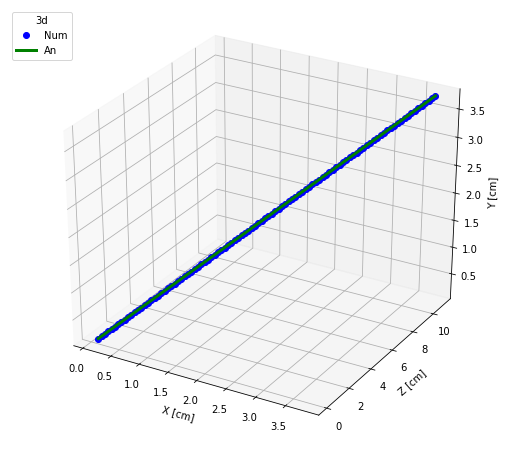

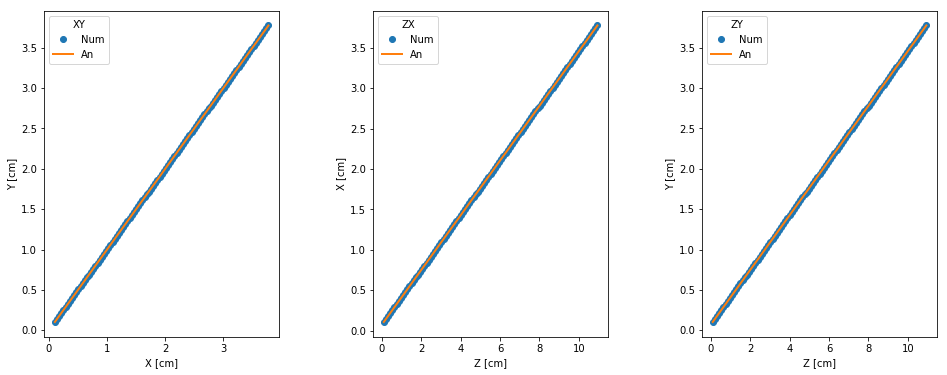

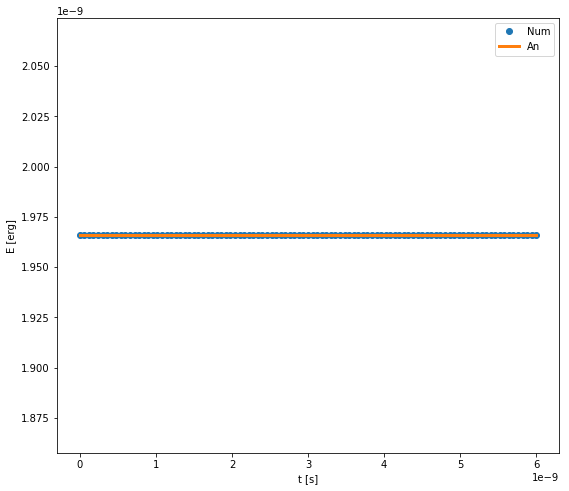

In [21]:
import pandas as pd
import os, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

def main():
    num = extract_num_trajectory_from_out_files()
    an = eval_an_trajectory_at_num_time_points( num )
    plot_trajectories( num , an )

def extract_num_trajectory_from_out_files():
    out_files = glob.glob("single_particle_free_space_[0-9][0-9][0-9][0-9][0-9][0-9][0-9]_new.h5")

    num_trajectory = []
    for f in out_files:
        num_trajectory.append( extract_time_pos_mom( f ) )    

    num_trajectory = sorted([ x for x in num_trajectory if x ], key = lambda x: x[0])
    return pd.DataFrame.from_records(num_trajectory, columns=('t', 'x', 'y', 'z', 'px', 'py', 'pz'))
    
def extract_time_pos_mom( h5file ):
    with h5py.File(h5file, mode="r") as h5:
        t = h5["/time_grid"].attrs["current_time"]
        particle_array = h5["/particle_arrays/0"]
        pos = particle_array["positions"][0]
        momentum = particle_array["momentums"][0]
    return [t] + list(pos) + list(momentum)

def eval_an_trajectory_at_num_time_points( num_trajectory ):
    global particle_mass
    particle_mass, pos0, mom0 =  get_mass_and_initial_pos_and_mom()

    an_trajectory = []
    for t in num_trajectory.t:
        pos = coords( particle_mass, t, pos0, mom0 )
        mom = momenta( t, mom0 )
        an_trajectory.append([t] + list(pos) + list(mom))

    return pd.DataFrame.from_records(an_trajectory, columns=('t', 'x', 'y', 'z', 'px', 'py', 'pz'))

def get_mass_and_initial_pos_and_mom():
    initial_out_file = "single_particle_free_space_0000000_new.h5"
    with h5py.File( initial_out_file, mode="r") as h5:
        particle_array = h5["/particle_arrays/0"]
        m = particle_array.attrs["mass"]
        pos0 = particle_array["positions"][0]
        mom0 = particle_array["momentums"][0]
    return m, pos0, mom0

def momenta( t, mom0 ):    
    return mom0

def coords( m, t, pos0, mom0 ):
    pos = pos0 + mom0 / m * t
    return pos

def plot_trajectories( num , an ):
    plot_3d( num, an )
    plot_2d( num, an )
    plot_kin_en( num , an )

def plot_3d( num, an ):
    fig = plt.figure()
    ax = fig.gca( projection='3d' )
    ax.plot( num.x, num.z, num.y, 'b.', markersize = 12, label = "Num" )
    ax.plot( an.x, an.z, an.y,  'g-', linewidth = 3, label = "An" )
    ax.set_xlabel('X [cm]')
    ax.set_ylabel('Z [cm]')
    ax.set_zlabel('Y [cm]')
    plt.legend( loc = 'upper left', title="3d" )
    #print( 'Saving 3d trajectory plot to "3d.png"' )
    #plt.savefig('3d.png')
    plt.show()

def plot_2d( num, an ):
    plt.figure( figsize=( 16, 6 ) )
    plt.subplots_adjust( left = None, bottom = None,
                         right = None, top = None,
                         wspace = 0.4, hspace = None )
    #XY
    ax = plt.subplot(131)
    plt.plot( num.x, num.y,
              linestyle='', marker='o',
              label = "Num" )
    plt.plot( an.x, an.y,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('X [cm]') 
    ax.set_ylabel('Y [cm]') 
    plt.legend( loc = 'upper left', title="XY" )
    #ZX
    ax = plt.subplot(132)
    plt.plot( num.z, num.x,
        linestyle='', marker='o',
        label = "Num" )
    plt.plot( an.z, an.x,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('Z [cm]') 
    ax.set_ylabel('X [cm]') 
    plt.legend( loc = 'upper left', title="ZX" )
    #ZY
    ax = plt.subplot(133)
    plt.plot( num.z, num.y,
        linestyle='', marker='o',
        label = "Num" )
    plt.plot( an.z, an.y,
              linestyle='-', marker='', lw = 2,
              label = "An" )
    ax.set_xlabel('Z [cm]') 
    ax.set_ylabel('Y [cm]') 
    plt.legend( loc = 'upper left', title="ZY" )
    #print( 'Saving 2d trajectory projection plots to "2d.png"' )
    #plt.savefig('2d.png')
    plt.show()
    
def plot_kin_en( num , an ):
    global particle_mass
    E_num = (num.px**2 + num.py**2 + num.pz**2) / ( 2 * particle_mass )
    E_an = (an.px**2 + an.py**2 + an.pz**2) / ( 2 * particle_mass )
    t = num.t
    plt.figure()
    axes = plt.gca()
    axes.set_xlabel( "t [s]" )
    axes.set_ylabel( "E [erg]" )
    # axes.set_ylim( [min( E_an.min(), E_num.min() ),
    #                 max( E_an.max(), E_num.max() ) ] )
    line, = plt.plot( t, E_num, 'o' )
    line.set_label( "Num" )
    line, = plt.plot( t, E_an, ls = 'solid', lw = 3 )
    line.set_label( "An" )
    plt.legend( loc = 'upper right' )
    #print( 'Saving kinetic energy comparison plot to "kin_en.png"' )
    #plt.savefig('kin_en.png')
    plt.show()


main()

It can be seen, that numerical trajectory (points) coincides with the analytical (line) and that the energy is conserved during the simulation.

### Plotting script

The `main` function of the script does exactly what is described above: extracts numerical trajectory from the output files, evaluates analytical trajectory at the extracted time points and plots both numerical and analytical trajectories on the same axes.

```
def main():
    num = extract_num_trajectory_from_out_files()
    an = eval_an_trajectory_at_num_time_points( num )
    plot_trajectories( num , an )
```

It uses [h5py](http://www.h5py.org/) library to read from h5 files, [numpy](http://www.numpy.org/) to simplify working with arrays and [matplotlib](https://matplotlib.org/) to perform plotting of the trajectory. 

```
import os, glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
```

Let's examine the function to obtain the numerical trajectory:

```
def extract_num_trajectory_from_out_files():
    out_files = find_necessary_out_files()                           # (*1)

    num_trajectory = []
    for f in out_files:
        num_trajectory.append( extract_time_pos_mom( f ) )           # (*2)  

    num_trajectory = remove_empty_and_sort_by_time( num_trajectory ) # (*3)
    num_trajectory = np.array( num_trajectory,                       # (*4)
                               dtype=[('t','float'),
                                      ('x','float'), ('y','float'), ('z','float'),
                                      ('px','float'), ('py','float'),('pz','float')])
    return( num_trajectory )
```

(\*1): To extract data, first we find all `*.h5` files in the current directory.  
(\*2): Then the script iterates over them and extracts a relevant data from each one.  
(\*3): In the end of this process, `num_trajectory` array contains positions and velocities of particle at different
time steps. In is convenient to sort it over time values.  
(\*4): After the previous step the numerical trajectory is in a format of a list of tuples:
`[ (t, x, y, z, px, py, pz), ..... ]` . It is convenient to convert it into one of the `np.array` types to simplify further manipulations with it.  

For analytical trajectory we need the initial position and momentum.
They can be extracted from the first h5-file:

```
def get_mass_and_initial_pos_and_mom():
    initial_out_file = "single_particle_free_space_0000000.h5"
    h5 = h5py.File( initial_out_file, mode="r")
    m = h5["/ParticleSources/emit_single_particle"].attrs["mass"][0]
    x0 = h5["/ParticleSources/emit_single_particle/position_x"][0]
    y0 = h5["/ParticleSources/emit_single_particle/position_y"][0]
    z0 = h5["/ParticleSources/emit_single_particle/position_z"][0]
    px0 = h5["/ParticleSources/emit_single_particle/momentum_x"][0]
    py0 = h5["/ParticleSources/emit_single_particle/momentum_y"][0]
    pz0 = h5["/ParticleSources/emit_single_particle/momentum_z"][0]
    h5.close()
    return( m, x0, y0, z0, px0, py0, pz0 )
```

With this function, the analytical trajectory can be computed at the same 
time points as the numerical one:

```
def eval_an_trajectory_at_num_time_points( num_trajectory ):
    global particle_mass
    particle_mass, x0, y0, z0, px0, py0, pz0 =  get_mass_and_initial_pos_and_mom()
    #
    an_trajectory = np.empty_like( num_trajectory )
    for i, t in enumerate( num_trajectory['t'] ):
        x, y, z = coords( particle_mass, t, x0, y0, z0, px0, py0, pz0 )
        px, py, pz = momenta( t, px0, py0, pz0 )
        an_trajectory[i] = ( t, x, y ,z, px, py, pz )
    #
    return( an_trajectory )
```

Finally, both numerical and analytical trajectories are plotted in 3d and side views. 
Kinetic energies are also compared.

```
def plot_trajectories( num , an ):
    plot_3d( num, an )
    plot_2d( num, an )
    plot_kin_en( num , an )
```